<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/caves_LinearRegressionWithAnimation_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

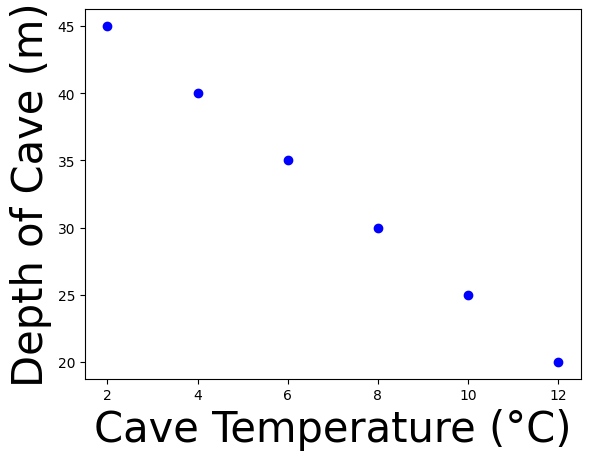

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns



xLabel = "Cave Temperature (°C)"
yLabel = "Depth of Cave (m)"

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

X,Y =np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/caves.txt",skiprows=1, unpack=True)
plt.xlabel(xLabel, fontsize=30)
plt.ylabel(yLabel,fontsize=30)
ax.plot(X,Y, "bo")

def graph(X1,Y1, id):
    ax.set_xlim(0, id)
    ax.cla()
    ax.plot(X1,Y1, "bo")
    line1, = ax.plot(X1,X1, 'b-')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.5)
    return line1


def updateLine(X1,Y1,theLine):
    plt.xlabel(xLabel, fontsize=30)
    plt.ylabel(yLabel,fontsize=30)
    theLine.set_ydata(Y1)
    theLine.set_xdata(X1)
    display(fig)
    clear_output(wait = True)
    #plt.pause(0.5)



In [14]:
def showHistory(X,Y,historyW, step=2):
  theLine=graph(X,Y,1)
  updateLineL = lambda w :  updateLine(X,predict(X,w[0],w[1]),theLine)
  for i in range(0,len(historyW),step):
    w=historyW[i]
    updateLineL(w)
  updateLineL(historyW[-1])

def predict(X, w,b):
  return X * w + b

def loss(X,Y,w,b):
  error = predict(X,w,b)-Y
  squared_error = error ** 2
  return np.average(squared_error)

def train(iterations, X,Y, lr):
  w=b=0
  historyW=[]
  for i in range(iterations):
    historyW.append([w,b])
    tmpLoss=loss(X,Y,w,b)
    print(f"\n iteration={i} bias={b} loss={tmpLoss}")
    if(loss(X,Y,w+lr,b)<tmpLoss):
      w+=lr
    elif(loss(X,Y,w-lr,b)<tmpLoss):
      w-=lr
    elif(loss(X,Y,w,b+lr)<tmpLoss):
      b+=lr
    elif(loss(X,Y,w,b-lr)<tmpLoss):
      b-=lr
    else:
      return [w,b, historyW]
  raise Exception(f"cannot convey after {iterations} iterations")

w,b, history =train(20000, X,Y, 0.01)
print(f"\nw={w}, b={b}")
print(f"Prediction: x=8, Y=>{predict(8, w,b)}")


Streaming output truncated to the last 5000 lines.
 iteration=3390 bias=27.460000000001493 loss=97.70226666665371

 iteration=3391 bias=27.470000000001495 loss=97.61556666665372

 iteration=3392 bias=27.480000000001496 loss=97.52906666665375

 iteration=3393 bias=27.490000000001498 loss=97.44276666665375

 iteration=3394 bias=27.5000000000015 loss=97.35666666665377

 iteration=3395 bias=27.5100000000015 loss=97.2707666666538

 iteration=3396 bias=27.5100000000015 loss=97.27076666665357

 iteration=3397 bias=27.520000000001502 loss=97.18366666665356

 iteration=3398 bias=27.530000000001504 loss=97.0967666666536

 iteration=3399 bias=27.540000000001505 loss=97.0100666666536

 iteration=3400 bias=27.550000000001507 loss=96.92356666665364

 iteration=3401 bias=27.56000000000151 loss=96.83726666665365

 iteration=3402 bias=27.57000000000151 loss=96.75116666665367

 iteration=3403 bias=27.58000000000151 loss=96.66526666665368

 iteration=3404 bias=27.590000000001513 loss=96.5795666666537

 i

KeyboardInterrupt: 

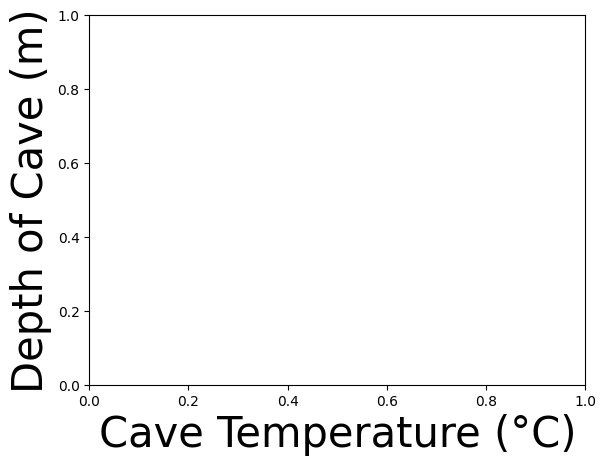

In [16]:
showHistory(X,Y, history,15)

In [4]:
print(f"Prediction: x=8, Y=>{predict(8, w,b)}")

Prediction: x=8, Y=>50.09999999999933
